In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp; from scipy.io import wavfile; from scipy import signal
import pydub
from pydub import AudioSegment
import statsmodels.tsa.stattools

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The sampling rate of the audio files.

In [3]:
sr = 44100
NN = int(2.5*sr)

Little function used to write to audio files.

In [4]:
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

# Get Data

In [5]:
df_a = pd.read_pickle("./acoustic_df.pkl")

In [6]:
E = np.array(df_a['E'].dropna())[0:NN]; Em = np.array(df_a['E_mute'].dropna())[0:NN]; 
A = np.array(df_a['A'].dropna())[0:NN]; Am = np.array(df_a['A_mute'].dropna())[0:NN]; 
D = np.array(df_a['D'].dropna())[0:NN]; Dm = np.array(df_a['D_mute'].dropna())[0:NN]; 
G = np.array(df_a['G'].dropna())[0:NN]; Gm = np.array(df_a['G_mute'].dropna())[0:NN]; 
B = np.array(df_a['B'].dropna())[0:NN]; Bm = np.array(df_a['B_mute'].dropna())[0:NN]; 
Eh = np.array(df_a['Eh'].dropna())[0:NN]; Ehm = np.array(df_a['Eh_mute'].dropna())[0:NN]; 

In [7]:
def remove_mean(arr):
    return np.mean(arr), arr-np.mean(arr)

_, E_d = remove_mean(E)
_, Em_d = remove_mean(Em)
_, A_d = remove_mean(A)
_, Am_d = remove_mean(Am)
_, D_d = remove_mean(D)
_, Dm_d = remove_mean(Dm)
_, G_d = remove_mean(G)
_, Gm_d = remove_mean(Gm)
_, B_d = remove_mean(B)
_, Bm_d = remove_mean(Bm)
_, Eh_d = remove_mean(Eh)
_, Ehm_d = remove_mean(Ehm)

In [8]:
write('modified_sounds/ac_E.mp3', sr, E_d, normalized=False)
write('modified_sounds/ac_A.mp3', sr, A_d, normalized=False)
write('modified_sounds/ac_D.mp3', sr, D_d, normalized=False)
write('modified_sounds/ac_G.mp3', sr, G_d, normalized=False)
write('modified_sounds/ac_B.mp3', sr, B_d, normalized=False)
write('modified_sounds/ac_Eh.mp3', sr, Eh_d, normalized=False)

write('modified_sounds/ac_Em.mp3', sr, Em_d, normalized=False)
write('modified_sounds/ac_Am.mp3', sr, Am_d, normalized=False)
write('modified_sounds/ac_Dm.mp3', sr, Dm_d, normalized=False)
write('modified_sounds/ac_Gm.mp3', sr, Gm_d, normalized=False)
write('modified_sounds/ac_Bm.mp3', sr, Bm_d, normalized=False)
write('modified_sounds/ac_Ehm.mp3', sr, Ehm_d, normalized=False)

In [28]:
tt_E = np.arange(0, len(E_d), 1)*1/sr
tt_A = np.arange(0, len(A_d), 1)*1/sr
tt_D = np.arange(0, len(D_d), 1)*1/sr
tt_G = np.arange(0, len(G_d), 1)*1/sr
tt_B = np.arange(0, len(B_d), 1)*1/sr
tt_Eh = np.arange(0, len(Eh_d), 1)*1/sr

tt_Em = np.arange(0, len(Em_d), 1)*1/sr
tt_Am = np.arange(0, len(Am_d), 1)*1/sr
tt_Dm = np.arange(0, len(Dm_d), 1)*1/sr
tt_Gm = np.arange(0, len(Gm_d), 1)*1/sr
tt_Bm = np.arange(0, len(Bm_d), 1)*1/sr
tt_Ehm = np.arange(0, len(Ehm_d), 1)*1/sr

In [29]:
E_freq = 82.4
A_freq = 110
D_freq = 146.83
G_freq = 196
B_freq = 246.94
Eh_freq = 329.63

# Plot the Time Series

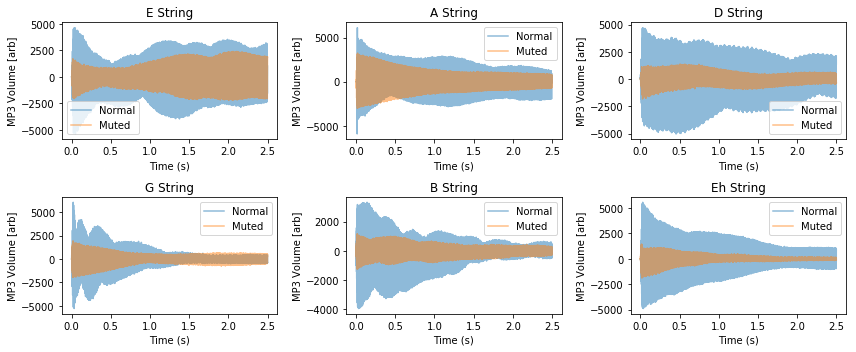

In [31]:
fig, ax = plt.subplots(2,3, figsize=(12,5))

ax[0][0].plot(tt_E, E_d, alpha=0.5, label='Normal'); ax[0][0].set_title('E String')
ax[0][0].plot(tt_Em, Em_d, alpha=0.5, label='Muted') 

ax[0][1].plot(tt_A, A_d, alpha=0.5, label='Normal'); ax[0][1].set_title('A String')
ax[0][1].plot(tt_Am, Am_d, alpha=0.5, label='Muted')

ax[0][2].plot(tt_D, D_d, alpha=0.5, label='Normal'); ax[0][2].set_title('D String')
ax[0][2].plot(tt_Dm, Dm_d, alpha=0.5, label='Muted')

ax[1][0].plot(tt_G, G_d, alpha=0.5, label='Normal'); ax[1][0].set_title('G String')
ax[1][0].plot(tt_Gm, Gm_d, alpha=0.5, label='Muted')

ax[1][1].plot(tt_B, B_d, alpha=0.5, label='Normal'); ax[1][1].set_title('B String')
ax[1][1].plot(tt_Bm, Bm_d, alpha=0.5, label='Muted')

ax[1][2].plot(tt_Eh, Eh_d, alpha=0.5, label='Normal'); ax[1][2].set_title('Eh String')
ax[1][2].plot(tt_Ehm, Ehm_d, alpha=0.5, label='Muted'); 

[a.set_xlabel('Time (s)') for a in ax.ravel()]
[a.set_ylabel('MP3 Volume [arb]') for a in ax.ravel()]
[a.legend() for a in ax.ravel()]

fig.tight_layout()
plt.savefig('plots/basic/Raw_Series.png',dpi=200)

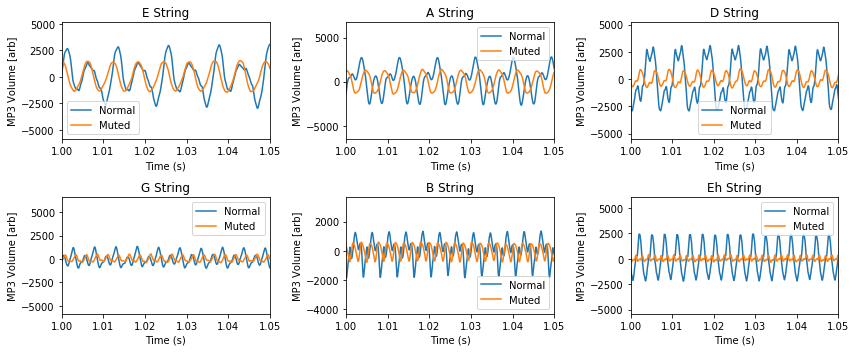

In [33]:
fig, ax = plt.subplots(2,3, figsize=(12,5))

ax[0][0].plot(tt_E, E_d, label='Normal'); ax[0][0].set_title('E String')
ax[0][0].plot(tt_Em, Em_d, label='Muted') 

ax[0][1].plot(tt_A, A_d, label='Normal'); ax[0][1].set_title('A String')
ax[0][1].plot(tt_Am, Am_d, label='Muted')

ax[0][2].plot(tt_D, D_d, label='Normal'); ax[0][2].set_title('D String')
ax[0][2].plot(tt_Dm, Dm_d, label='Muted')

ax[1][0].plot(tt_G, G_d, label='Normal'); ax[1][0].set_title('G String')
ax[1][0].plot(tt_Gm, Gm_d, label='Muted')

ax[1][1].plot(tt_B, B_d, label='Normal'); ax[1][1].set_title('B String')
ax[1][1].plot(tt_Bm, Bm_d, label='Muted')

ax[1][2].plot(tt_Eh, Eh_d,  label='Normal'); ax[1][2].set_title('Eh String')
ax[1][2].plot(tt_Ehm, Ehm_d,  label='Muted'); 

[a.set_xlabel('Time (s)') for a in ax.ravel()]
[a.set_ylabel('MP3 Volume [arb]') for a in ax.ravel()]
[a.legend() for a in ax.ravel()]
[a.set_xlim(1,1.05) for a in ax.ravel()]

fig.tight_layout()
plt.savefig('plots/basic/Raw_Series_Zoom.png',dpi=200)

# Autocovariance Sequences

In [12]:
st_b_Ed = statsmodels.tsa.stattools.acovf(E_d, unbiased=False); st_b_Ed = st_b_Ed/st_b_Ed[0]
st_b_Ad = statsmodels.tsa.stattools.acovf(A_d, unbiased=False); st_b_Ad = st_b_Ad/st_b_Ad[0]
st_b_Dd = statsmodels.tsa.stattools.acovf(D_d, unbiased=False); st_b_Dd = st_b_Dd/st_b_Dd[0]
st_b_Gd = statsmodels.tsa.stattools.acovf(G_d, unbiased=False); st_b_Gd = st_b_Gd/st_b_Gd[0]
st_b_Bd = statsmodels.tsa.stattools.acovf(B_d, unbiased=False); st_b_Bd = st_b_Bd/st_b_Bd[0]
st_b_Ehd = statsmodels.tsa.stattools.acovf(Eh_d, unbiased=False); st_b_Ehd = st_b_Ehd/st_b_Ehd[0]

st_u_Ed = statsmodels.tsa.stattools.acovf(E_d, unbiased=True); st_u_Ed = st_u_Ed/st_u_Ed[0]
st_u_Ad = statsmodels.tsa.stattools.acovf(A_d, unbiased=True); st_u_Ad = st_u_Ad/st_u_Ad[0]
st_u_Dd = statsmodels.tsa.stattools.acovf(D_d, unbiased=True); st_u_Dd = st_u_Dd/st_u_Dd[0]
st_u_Gd = statsmodels.tsa.stattools.acovf(G_d, unbiased=True); st_u_Gd = st_u_Gd/st_u_Gd[0]
st_u_Bd = statsmodels.tsa.stattools.acovf(B_d, unbiased=True); st_u_Bd = st_u_Bd/st_u_Bd[0]
st_u_Ehd = statsmodels.tsa.stattools.acovf(Eh_d, unbiased=True); st_u_Ehd = st_u_Ehd/st_u_Ehd[0]

In [13]:
st_b_Emd = statsmodels.tsa.stattools.acovf(Em_d, unbiased=False); st_b_Emd = st_b_Emd/st_b_Emd[0]
st_b_Amd = statsmodels.tsa.stattools.acovf(Am_d, unbiased=False); st_b_Amd = st_b_Amd/st_b_Amd[0]
st_b_Dmd = statsmodels.tsa.stattools.acovf(Dm_d, unbiased=False); st_b_Dmd = st_b_Dmd/st_b_Dmd[0]
st_b_Gmd = statsmodels.tsa.stattools.acovf(Gm_d, unbiased=False); st_b_Gmd = st_b_Gmd/st_b_Gmd[0]
st_b_Bmd = statsmodels.tsa.stattools.acovf(Bm_d, unbiased=False); st_b_Bmd = st_b_Bmd/st_b_Bmd[0]
st_b_Ehmd = statsmodels.tsa.stattools.acovf(Ehm_d, unbiased=False); st_b_Ehmd = st_b_Ehmd/st_b_Ehmd[0]

st_u_Emd = statsmodels.tsa.stattools.acovf(Em_d, unbiased=True); st_u_Emd = st_u_Emd/st_u_Emd[0]
st_u_Amd = statsmodels.tsa.stattools.acovf(Am_d, unbiased=True); st_u_Amd = st_u_Amd/st_u_Amd[0]
st_u_Dmd = statsmodels.tsa.stattools.acovf(Dm_d, unbiased=True); st_u_Dmd = st_u_Dmd/st_u_Dmd[0]
st_u_Gmd = statsmodels.tsa.stattools.acovf(Gm_d, unbiased=True); st_u_Gmd = st_u_Gmd/st_u_Gmd[0]
st_u_Bmd = statsmodels.tsa.stattools.acovf(Bm_d, unbiased=True); st_u_Bmd = st_u_Bmd/st_u_Bmd[0]
st_u_Ehmd = statsmodels.tsa.stattools.acovf(Ehm_d, unbiased=True); st_u_Ehmd = st_u_Ehmd/st_u_Ehmd[0]

In [14]:
def get_timearr(arr):
    return np.arange(0,len(arr),1)*(1/sr)

In [15]:
def plot_st(ax, i, arr1_u, arr1_b, arr2_u, arr2_b, notename):
    ax[i,0].plot(get_timearr(arr1_u), arr1_u, alpha=0.5, label='Unbiased')
    ax[i,0].plot(get_timearr(arr1_b), arr1_b, alpha=0.5, label='Biased')
    ax[i,0].set_title(notename)
    
    ax[i,1].plot(get_timearr(arr1_u), arr1_u, alpha=0.5, label='Unbiased')
    ax[i,1].plot(get_timearr(arr1_b), arr1_b, alpha=0.5, label='Biased')
    ax[i,1].set_xlim(1,1.05)
    ax[i,1].set_title(notename)
    
    ax[i,2].plot(get_timearr(arr2_u), arr2_u, alpha=0.5, label='Unbiased')
    ax[i,2].plot(get_timearr(arr2_b), arr2_b, alpha=0.5, label='Biased')
    ax[i,2].set_title(notename+' Muted')

    ax[i,3].plot(get_timearr(arr2_u), arr2_u, alpha=0.5, label='Unbiased')
    ax[i,3].plot(get_timearr(arr2_b), arr2_b, alpha=0.5, label='Biased')
    ax[i,3].set_xlim(1,1.05)
    ax[i,3].set_title(notename+' Muted')

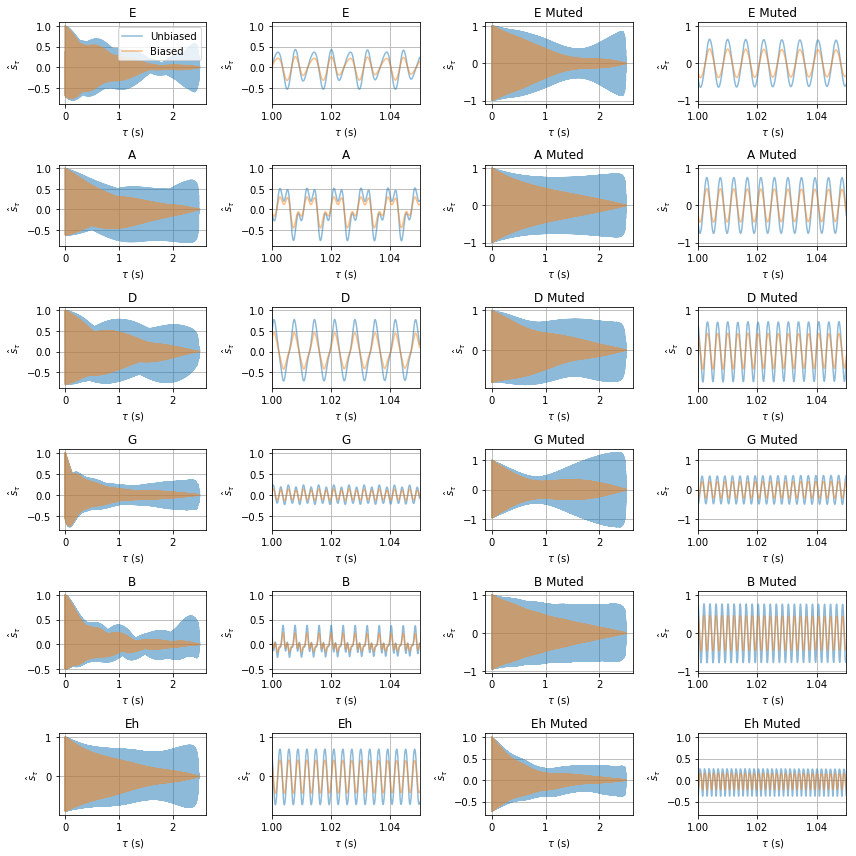

In [35]:
fig, ax = plt.subplots(6, 4, figsize=(12,12))

plot_st(ax, 0, st_u_Ed, st_b_Ed, st_u_Emd, st_b_Emd, 'E')
ax[0,0].legend()

plot_st(ax, 1, st_u_Ad, st_b_Ad, st_u_Amd, st_b_Amd, 'A')
plot_st(ax, 2, st_u_Dd, st_b_Dd, st_u_Dmd, st_b_Dmd, 'D')
plot_st(ax, 3, st_u_Gd, st_b_Gd, st_u_Gmd, st_b_Gmd, 'G')
plot_st(ax, 4, st_u_Bd, st_b_Bd, st_u_Bmd, st_b_Bmd, 'B')
plot_st(ax, 5, st_u_Ehd, st_b_Ehd, st_u_Ehmd, st_b_Ehmd, 'Eh')



[a.set_xlabel(r'$\tau$ (s)') for a  in ax.ravel()]
[a.set_ylabel(r'$\hat{s}_{\tau}$') for a  in ax.ravel()]
[a.grid() for a in ax.ravel()]


fig.tight_layout()
plt.savefig('plots/basic/autocov.png',dpi=200)

# Basic Periodogram Stuff

In [17]:
f_Ed, Pxx_den_Ed = signal.periodogram(E_d, sr)
f_Ad, Pxx_den_Ad = signal.periodogram(A_d, sr)
f_Dd, Pxx_den_Dd = signal.periodogram(D_d, sr)
f_Gd, Pxx_den_Gd = signal.periodogram(G_d, sr)
f_Bd, Pxx_den_Bd = signal.periodogram(B_d, sr)
f_Ehd, Pxx_den_Ehd = signal.periodogram(Eh_d, sr)

f_Emd, Pxx_den_Emd = signal.periodogram(Em_d, sr)
f_Amd, Pxx_den_Amd = signal.periodogram(Am_d, sr)
f_Dmd, Pxx_den_Dmd = signal.periodogram(Dm_d, sr)
f_Gmd, Pxx_den_Gmd = signal.periodogram(Gm_d, sr)
f_Bmd, Pxx_den_Bmd = signal.periodogram(Bm_d, sr)
f_Ehmd, Pxx_den_Ehmd = signal.periodogram(Ehm_d, sr)

In [18]:
def plotter_periodogram(ax, f, P, fm, Pm, freq, notename):
    ax.semilogy(f, P, label='Normal')
    ax.semilogy(fm, Pm, alpha=0.7, label='Muted')
    [ax.axvline(freq*i, c='k', ls='--', alpha=0.5) for i in range(20)]
    ax.set_title('{} String'.format(notename))

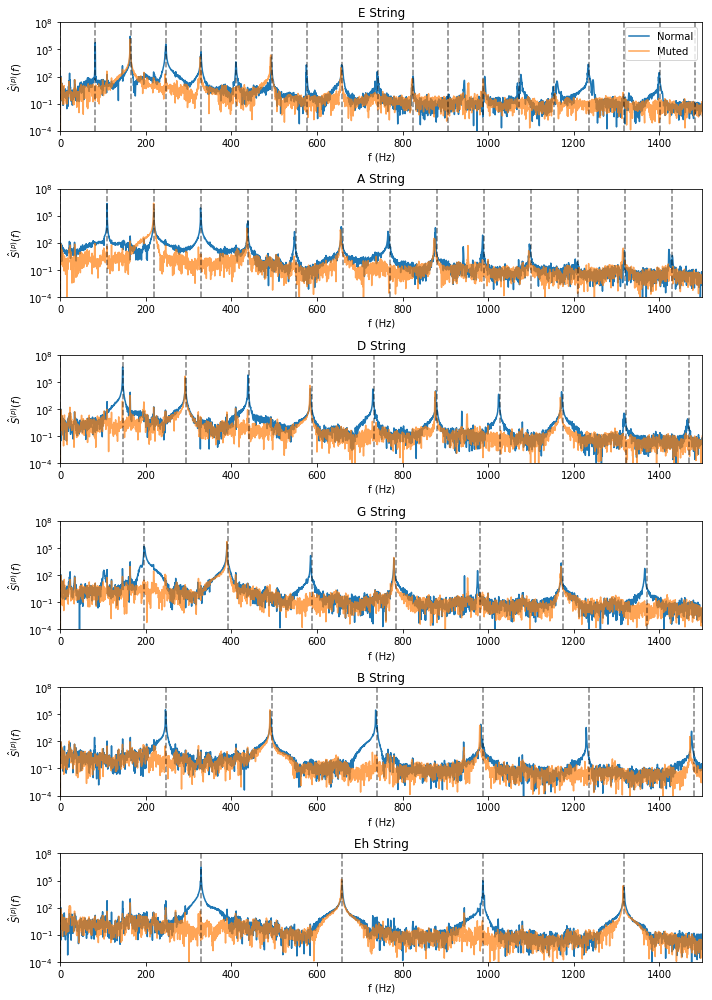

In [36]:
fig, ax = plt.subplots(6, 1, figsize=(10,14))

plotter_periodogram(ax[0], f_Ed, Pxx_den_Ed, f_Emd, Pxx_den_Emd, E_freq, 'E')
plotter_periodogram(ax[1], f_Ad, Pxx_den_Ad, f_Amd, Pxx_den_Amd, A_freq, 'A')
plotter_periodogram(ax[2], f_Dd, Pxx_den_Dd, f_Dmd, Pxx_den_Dmd, D_freq, 'D')
plotter_periodogram(ax[3], f_Gd, Pxx_den_Gd, f_Gmd, Pxx_den_Gmd, G_freq, 'G')
plotter_periodogram(ax[4], f_Bd, Pxx_den_Bd, f_Bmd, Pxx_den_Bmd, B_freq, 'B')
plotter_periodogram(ax[5], f_Ehd, Pxx_den_Ehd, f_Ehmd, Pxx_den_Ehmd, Eh_freq, 'Eh')
ax[0].legend()


[a.set_xlim(0, 1500) for a in ax.ravel()]
[a.set_ylim(10**-4, 10**8) for a in ax.ravel()]
[a.set_xlabel('f (Hz)') for a in ax.ravel()]
[a.set_ylabel('$\hat{S}^{(p)}(f)$') for a in ax.ravel()]

fig.tight_layout()
plt.savefig('plots/basic/periodogram.png',dpi=200)